In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten , BatchNormalization
from keras.layers import Conv2D, MaxPooling2D , AveragePooling2D,GlobalAveragePooling2D
from keras import models, layers
from keras.layers import LSTM,TimeDistributed
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import tensorflow
from tensorflow import keras
from keras import layers, models
from sklearn.metrics import accuracy_score

In [ ]:
train_path = "/content/drive/MyDrive/Data_Malware/Data_Train"
val_path = "/content/drive/MyDrive/Data_Malware/Data_Val"
test_path = "/content/drive/MyDrive/Data_Malware/Data_Test"

In [ ]:
img_size = (224, 224)
batch_size = 64

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size
)

Found 2582 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    seed=123,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size
)

Found 310 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size
)

Found 310 files belonging to 2 classes.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode="binary")

test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode="binary")

val_generator = val_datagen.flow_from_directory(test_path,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                 class_mode="binary")

Found 2582 images belonging to 2 classes.
Found 310 images belonging to 2 classes.
Found 310 images belonging to 2 classes.


In [ ]:
input_shape = (img_size[0], img_size[1], 3)
print(input_shape)

(224, 224, 3)


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

# Loading Resnet50 model
rn50_model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)

for layer in rn50_model.layers:
    layer.trainable = False

In [ ]:
rn50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dropout(0.5)
prediction_layer = layers.Dense(1, activation='sigmoid')


model = models.Sequential([
    rn50_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001)

model.compile(
    optimizer = optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True, verbose = 0)

In [ ]:
epochs = 50

rn50_history = model.fit_generator(train_generator,
				    steps_per_epoch = train_generator.samples // batch_size,
				    validation_data = val_generator, 
				    validation_steps = val_generator.samples // batch_size,
					epochs=epochs,
          callbacks=[es])

<ipython-input-73-27b690fd5f3b>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  rn50_history = model.fit_generator(train_generator,


Epoch 1/50
40/40 [==============================] - 43s 958ms/step - loss: 2.5093 - accuracy: 0.5123 - val_loss: 0.6964 - val_accuracy: 0.5195
Epoch 2/50
40/40 [==============================] - 38s 941ms/step - loss: 0.6982 - accuracy: 0.5262 - val_loss: 0.6931 - val_accuracy: 0.5117
Epoch 3/50
40/40 [==============================] - 38s 951ms/step - loss: 0.6928 - accuracy: 0.5286 - val_loss: 0.6929 - val_accuracy: 0.5156
Epoch 4/50
40/40 [==============================] - 39s 977ms/step - loss: 0.6926 - accuracy: 0.5286 - val_loss: 0.6931 - val_accuracy: 0.5078
Epoch 5/50
40/40 [==============================] - 39s 950ms/step - loss: 0.6924 - accuracy: 0.5289 - val_loss: 0.6928 - val_accuracy: 0.5156
Epoch 6/50
40/40 [==============================] - 39s 977ms/step - loss: 0.6988 - accuracy: 0.5298 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 7/50
40/40 [==============================] - 39s 969ms/step - loss: 0.6921 - accuracy: 0.5290 - val_loss: 0.6927 - val_accuracy: 0.5156

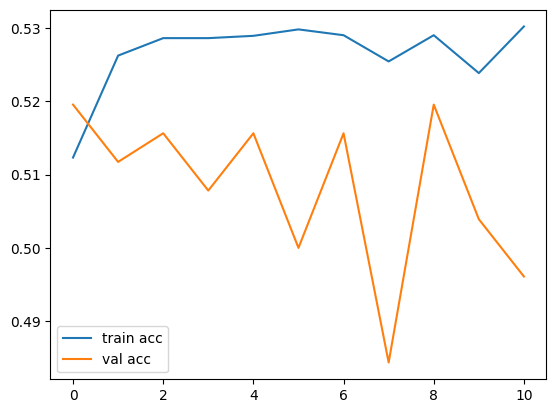

In [ ]:
plt.plot(rn50_history.history['accuracy'], label='train acc')
plt.plot(rn50_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.close()

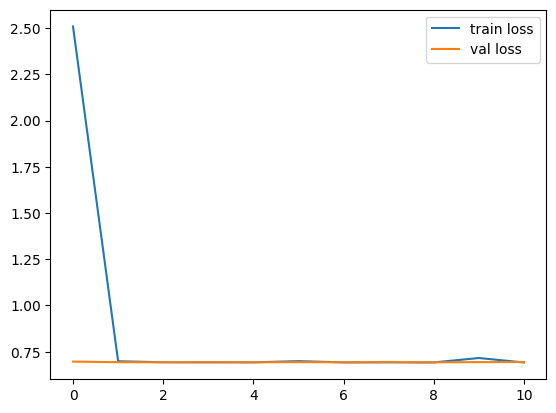

In [ ]:
plt.plot(rn50_history.history['loss'], label='train loss')
plt.plot(rn50_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.close()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_generator)
y_pred_labels = np.round(y_pred).astype(int)
y_true = np.concatenate([y for _, y in test_ds], axis=0)
report = classification_report(y_true, y_pred_labels)

print(report)

5/5 [==============================] - 5s 804ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.52      1.00      0.68       160

    accuracy                           0.52       310
   macro avg       0.26      0.50      0.34       310
weighted avg       0.27      0.52      0.35       310



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_true, y_pred_labels)
f1 = f1_score(y_true, y_pred_labels, average='weighted')

In [ ]:
print('Accuracy:', accuracy)
print('F1-Score:', f1)

Accuracy: 0.5161290322580645
F1-Score: 0.3514070006863418
